# Diagnosing and Remedying Heteroscedasticity and Muliticollinearity

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('employees2.csv')
df.head()

,Age,Attrition,Education,Expereince,NumoFProjects,DailyRate,Department,EducationField,EmployeeCount,EmployeeNumber,...,MonthlyRate,OverTime,PercentSalaryHike,PerformanceRating,StandardHours,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,BusinessTravel
0,41,Yes,2,8,8,1102,Sales,Life Sciences,1,1,...,19479,Yes,11,3,80,0,6,4,0,Travel_Rarely
1,49,No,1,10,1,279,Research & Development,Life Sciences,1,2,...,24907,No,23,4,80,3,10,7,1,Travel_Frequently
2,37,Yes,2,7,6,1373,Research & Development,Other,1,4,...,2396,Yes,15,3,80,3,0,0,0,Travel_Rarely
3,33,No,4,8,1,1392,Research & Development,Life Sciences,1,5,...,23159,Yes,11,3,80,3,8,7,3,Travel_Frequently
4,27,No,1,6,9,591,Research & Development,Medical,1,7,...,16632,No,12,3,80,3,2,2,2,Travel_Rarely


In [3]:
df.isna().sum()

Age                        0
Attrition                  0
Education                  0
Expereince                 0
NumoFProjects              0
DailyRate                  0
Department                 0
EducationField             0
EmployeeCount              0
EmployeeNumber             0
Gender                     0
HourlyRate                 0
JobInvolvement             0
JobLevel                   0
JobRole                    0
JobSatisfaction            0
MonthlyIncome              0
MonthlyRate                0
OverTime                   0
PercentSalaryHike          0
PerformanceRating          0
StandardHours              0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
BusinessTravel             0
dtype: int64

In [4]:
x=df.iloc[:,2:5]
x

,Education,Expereince,NumoFProjects
0,2,8,8
1,1,10,1
2,2,7,6
3,4,8,1
4,1,6,9
...,...,...,...
1465,2,17,4
1466,1,9,4
1467,3,6,1
1468,3,17,2


In [5]:
y=df.iloc[:,20:21]
y

,PerformanceRating
0,3
1,4
2,3
3,3
4,3
...,...
1465,3
1466,3
1467,4
1468,3


# Split the dataset

In [6]:
import sklearn
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=2)

# Build the model

In [7]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
print('Training Started...\n')
print()
lin_reg.fit(xtrain,ytrain)
print()
print('Training Completed.....\n')
print()
print('Testing invoked....\n')
ypred=lin_reg.predict(xtest)
print('Predict Total Payment\n',ypred)
print('\n Testing is also Completed...\n')


Training Started...



Training Completed.....


Testing invoked....

Predict Total Payment
 [[3.16041091]
 [3.14603432]
 [3.15497796]
 [3.1493531 ]
 [3.14548532]
 [3.15395636]
 [3.1479527 ]
 [3.15644544]
 [3.14716294]
 [3.16674064]
 [3.14083322]
 [3.15916637]
 [3.15780591]
 [3.15041464]
 [3.15229697]
 [3.1544689 ]
 [3.15212288]
 [3.17851222]
 [3.17063012]
 [3.14467386]
 [3.1629    ]
 [3.15290373]
 [3.14520463]
 [3.15301074]
 [3.14963379]
 [3.15471898]
 [3.15750698]
 [3.17655391]
 [3.15342559]
 [3.15305959]
 [3.16916264]
 [3.17063012]
 [3.15467013]
 [3.1493531 ]
 [3.17377481]
 [3.15543275]
 [3.14626617]
 [3.15603059]
 [3.15437121]
 [3.15739106]
 [3.16572794]
 [3.1457354 ]
 [3.14550355]
 [3.14850518]
 [3.16508125]
 [3.16301592]
 [3.15305959]
 [3.17217359]
 [3.16017907]
 [3.16059392]
 [3.16142361]
 [3.14405778]
 [3.14460678]
 [3.14626617]
 [3.17270436]
 [3.16323886]
 [3.16383671]
 [3.14478978]
 [3.15414827]
 [3.14394186]
 [3.15317551]
 [3.14792556]
 [3.15359036]
 [3.15584759]
 [3.1508294

In [8]:
residuals=ytest-ypred
residuals

,PerformanceRating
721,-0.160411
843,0.853966
627,0.845022
1368,-0.149353
305,-0.145485
...,...
1230,-0.172704
995,-0.160179
682,0.847538
215,-0.157922


array([[<Axes: title={'center': 'PerformanceRating'}>]], dtype=object)

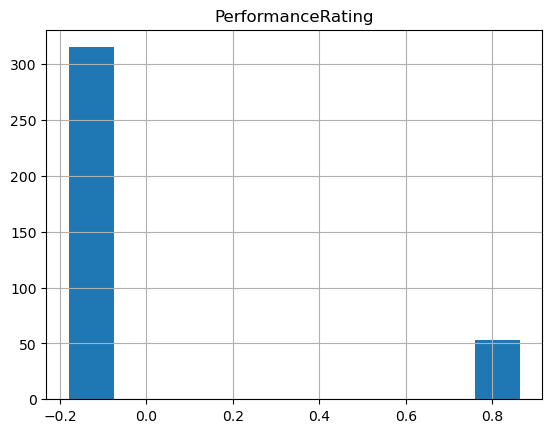

In [9]:
residuals.hist()

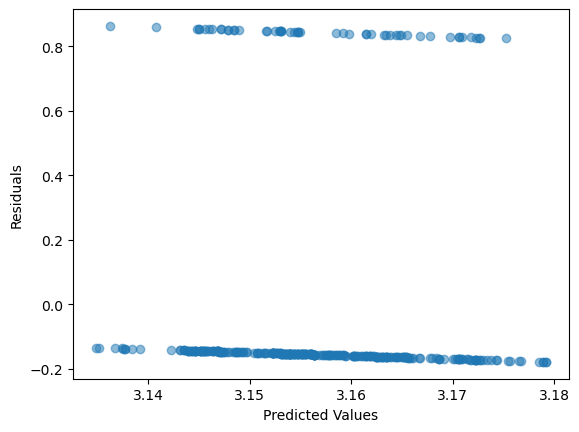

In [10]:
plt.scatter(ypred, residuals, alpha=0.5)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

Text(0, 0.5, 'Residuals')

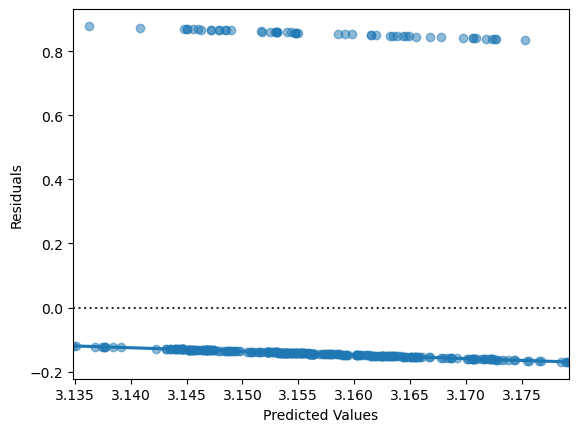

In [11]:
sns.residplot(x=ypred, y=residuals, lowess=True, scatter_kws={'alpha': 0.5})

plt.xlabel("Predicted Values")
plt.ylabel("Residuals")

In [14]:
exog_with_const = sm.add_constant(ypred)

In [15]:

import statsmodels.api as sm

from statsmodels.stats.diagnostic import het_breuschpagan


lm, p_lm, f_lm, fp_lm = het_breuschpagan(residuals, exog_with_const)
# Print the results
print("Breusch-Pagan Test:")
print(f"LM Statistic: {lm}")
print(f"P-value: {p_lm}")





Breusch-Pagan Test:
LM Statistic: 0.33620601723354504
P-value: 0.5620274103882142


# Transform the data

In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Attrition']=le.fit_transform(df['Attrition'])
df['Department']=le.fit_transform(df['Department'])
df['Education']=le.fit_transform(df['Education'])
df['Gender']=le.fit_transform(df['Gender'])
df['JobRole']=le.fit_transform(df['JobRole'])
df['OverTime']=le.fit_transform(df['OverTime'])
df['BusinessTravel']=le.fit_transform(df['BusinessTravel'])
df.head()

,Age,Attrition,Education,Expereince,NumoFProjects,DailyRate,Department,EducationField,EmployeeCount,EmployeeNumber,...,MonthlyRate,OverTime,PercentSalaryHike,PerformanceRating,StandardHours,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,BusinessTravel
0,41,1,1,8,8,1102,2,Life Sciences,1,1,...,19479,1,11,3,80,0,6,4,0,2
1,49,0,0,10,1,279,1,Life Sciences,1,2,...,24907,0,23,4,80,3,10,7,1,1
2,37,1,1,7,6,1373,1,Other,1,4,...,2396,1,15,3,80,3,0,0,0,2
3,33,0,3,8,1,1392,1,Life Sciences,1,5,...,23159,1,11,3,80,3,8,7,3,1
4,27,0,0,6,9,591,1,Medical,1,7,...,16632,0,12,3,80,3,2,2,2,2


In [17]:
x=df.iloc[:,0:6]
x

,Age,Attrition,Education,Expereince,NumoFProjects,DailyRate
0,41,1,1,8,8,1102
1,49,0,0,10,1,279
2,37,1,1,7,6,1373
3,33,0,3,8,1,1392
4,27,0,0,6,9,591
...,...,...,...,...,...,...
1465,36,0,1,17,4,884
1466,39,0,0,9,4,613
1467,27,0,2,6,1,155
1468,49,0,2,17,2,1023


# Calculating the VIF

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

        # Calculating VIF

        vif = pd.DataFrame()

        vif["variables"]=X.columns

        vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

        return(vif)
ab=calc_vif(x)
ab

,variables,VIF
0,Age,13.825738
1,Attrition,1.195249
2,Education,4.496812
3,Expereince,5.220238
4,NumoFProjects,2.413912
5,DailyRate,4.201661


In [19]:
x=x.drop(["Age","Attrition"],axis=1)
calc_vif(x)

,variables,VIF
0,Education,3.392911
1,Expereince,3.007236
2,NumoFProjects,2.254091
3,DailyRate,3.054568


# Build Ridge Model

In [22]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
print("*************Ridge Regression Model*************")
print()
rr=Ridge(alpha=0.01)
rr.fit(xtrain,ytrain)
rr_pred=rr.predict(xtest)
print("Ridge Train_score:\t", rr.score(xtrain,ytrain))
print()
print("Ridge Test_score:\t", rr.score(xtest,ytest))
print()
print("Ridge R-Square:\t",r2_score(ytest,rr_pred))


*************Ridge Regression Model*************

Ridge Train_score:	 0.0006941951866101803

Ridge Test_score:	 -0.000368497637732057

Ridge R-Square:	 -0.000368497637732057


In [23]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
print('Mean Squared Error: \t', mean_squared_error(ytest, ypred))
print()
print('RMSE: \t', np.sqrt(mean_squared_error(ytest, ypred)))
print()
print('Variance Score:\t', explained_variance_score (ytest,ypred))


print()
print('R-Square: \t', r2_score (ytest, ypred))

Mean Squared Error: 	 0.12332490625334763

RMSE: 	 0.3511764602779458

Variance Score:	 0.0008849883489326915

R-Square: 	 -0.000368499817511303
